## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
Learning_rate = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epochs = 50
batch_size = 256
momentum = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in Learning_rate:
    keras.backend.clear_session()
    print('Experiment with Learning_rate = {:.6f}'.format(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=momentum)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-lr-{}'.format(lr)
    results[exp_name_tag] = {'train_loss' : train_loss,
                             'valid_loss' : valid_loss,
                             'train_acc' : train_acc,
                             'valid_acc' : valid_acc}

Experiment with Learning_rate = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [

Epoch 49/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1841 - accuracy: 0.1559 - val_loss: 2.2144 - val_accuracy: 0.1462
Epoch 50/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.1928 - accuracy: 0.1498 - val_loss: 2.1440 - val_accuracy: 0.1651
Experiment with Learning_rate = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
____________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.6726 - accuracy: 0.7566 - val_loss: 1.6691 - val_accuracy: 0.5286
Epoch 48/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.6389 - accuracy: 0.7695 - val_loss: 1.6950 - val_accuracy: 0.5231
Epoch 49/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.6590 - accuracy: 0.7606 - val_loss: 1.7410 - val_accuracy: 0.5239
Epoch 50/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.6545 - accuracy: 0.7622 - val_loss: 1.7280 - val_accuracy: 0.5286
Experiment with Learning_rate = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
____________________

50000/50000 [==============================] - 5s 93us/step - loss: 1.0223 - accuracy: 0.6410 - val_loss: 1.3310 - val_accuracy: 0.5377
Epoch 45/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.0059 - accuracy: 0.6469 - val_loss: 1.3488 - val_accuracy: 0.5299
Epoch 46/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.0004 - accuracy: 0.6469 - val_loss: 1.3284 - val_accuracy: 0.5381
Epoch 47/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9926 - accuracy: 0.6511 - val_loss: 1.3415 - val_accuracy: 0.5348
Epoch 48/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9836 - accuracy: 0.6557 - val_loss: 1.3208 - val_accuracy: 0.5443
Epoch 49/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9687 - accuracy: 0.6611 - val_loss: 1.3248 - val_accuracy: 0.5413
Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9457 - accuracy: 0.6706 - val_loss: 1.3525

50000/50000 [==============================] - 5s 90us/step - loss: 1.5921 - accuracy: 0.4443 - val_loss: 1.6035 - val_accuracy: 0.4393
Epoch 43/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5876 - accuracy: 0.4466 - val_loss: 1.6036 - val_accuracy: 0.4402
Epoch 44/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5827 - accuracy: 0.4486 - val_loss: 1.5977 - val_accuracy: 0.4397
Epoch 45/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5772 - accuracy: 0.4500 - val_loss: 1.5932 - val_accuracy: 0.4417
Epoch 46/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5727 - accuracy: 0.4528 - val_loss: 1.5888 - val_accuracy: 0.4443
Epoch 47/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5682 - accuracy: 0.4528 - val_loss: 1.5886 - val_accuracy: 0.4405
Epoch 48/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5655 - accuracy: 0.4540 - val_loss: 1.5844

50000/50000 [==============================] - 5s 95us/step - loss: 1.9572 - accuracy: 0.3210 - val_loss: 1.9549 - val_accuracy: 0.3242
Epoch 41/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9532 - accuracy: 0.3221 - val_loss: 1.9510 - val_accuracy: 0.3258
Epoch 42/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.9493 - accuracy: 0.3231 - val_loss: 1.9471 - val_accuracy: 0.3273
Epoch 43/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.9455 - accuracy: 0.3246 - val_loss: 1.9434 - val_accuracy: 0.3274
Epoch 44/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.9418 - accuracy: 0.3255 - val_loss: 1.9398 - val_accuracy: 0.3282
Epoch 45/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.9381 - accuracy: 0.3265 - val_loss: 1.9363 - val_accuracy: 0.3308
Epoch 46/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.9347 - accuracy: 0.3280 - val_loss: 1.9329

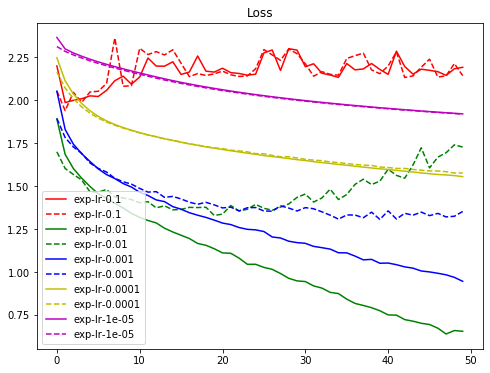

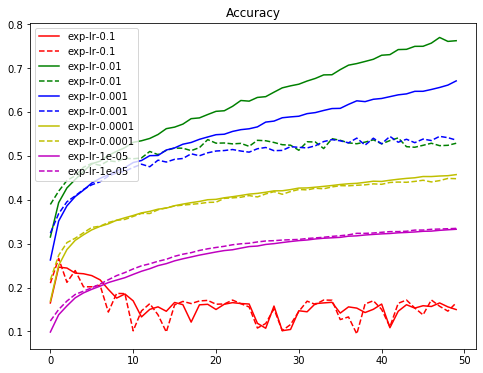

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])), results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])), results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()